<a href="https://colab.research.google.com/github/aksharkakkad-web/Project-Portfolio/blob/main/Housing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import math
uploaded = files.upload()

Saving HousingData.csv to HousingData (4).csv


In [ ]:
df=pd.read_csv("HousingData.csv")
X=df.drop("MEDV",axis=1).values

y=df["MEDV"].values
print(X.shape)
print(y.shape)
col_mean=np.nanmean(X,axis=0)
inds=np.where(np.isnan(X))
X[inds]=np.take(col_mean,inds[1])
arrRange=np.max(X,axis=0)-np.min(X,axis=0)
non0range= arrRange!=0
X_norm=X[:,non0range]-np.mean(X[:,non0range],axis=0)
X_norm/=arrRange[non0range]
print(X[:5])
print(X_norm[:5])

(506, 13)
(506,)
[[6.32000000e-03 1.80000000e+01 2.31000000e+00 0.00000000e+00
  5.38000000e-01 6.57500000e+00 6.52000000e+01 4.09000000e+00
  1.00000000e+00 2.96000000e+02 1.53000000e+01 3.96900000e+02
  4.98000000e+00]
 [2.73100000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 6.42100000e+00 7.89000000e+01 4.96710000e+00
  2.00000000e+00 2.42000000e+02 1.78000000e+01 3.96900000e+02
  9.14000000e+00]
 [2.72900000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 7.18500000e+00 6.11000000e+01 4.96710000e+00
  2.00000000e+00 2.42000000e+02 1.78000000e+01 3.92830000e+02
  4.03000000e+00]
 [3.23700000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 6.99800000e+00 4.58000000e+01 6.06220000e+00
  3.00000000e+00 2.22000000e+02 1.87000000e+01 3.94630000e+02
  2.94000000e+00]
 [6.90500000e-02 0.00000000e+00 2.18000000e+00 0.00000000e+00
  4.58000000e-01 7.14700000e+00 5.42000000e+01 6.06220000e+00
  3.00000000e+00 2.22000000e+02 1.87000000e

In [ ]:
def compute_cost(X,y,w,b, *argv):
  m,n=X.shape
  f_wb=np.dot(X,w)+b
  total_cost=0
  for i in range(m):
    cost=0
    cost=f_wb[i]-y[i]
    cost=cost**2
    total_cost+=cost
  total_cost/=(2*m)
  return total_cost


In [ ]:
def reg_cost(X, y, w, b, lambda_ = 1):
  m,n=X.shape
  norm_cost=compute_cost(X,y,w,b)
  reg_cost=0.
  for i in range(n):
    reg_cost+=w[i]**2
  reg_cost*=(lambda_)/(2*m)
  return norm_cost+reg_cost

In [ ]:
def compute_gradient(X,y,w,b):
  m,n=X.shape
  dj_dw=np.zeros(w.shape)
  dj_db=0.
  for i in range(m):
    f_wb=np.dot(X[i],w)+b
    dj_db_i=f_wb-y[i]
    dj_db+=dj_db_i
    for j in range(n):
      dj_dw[j]+=(f_wb-y[i])*X[i,j]
  dj_db/=m
  dj_dw/=m
  return dj_dw,dj_db

In [ ]:
def reg_gradient(X,y,w,b,lambda_):
  m,n=X.shape
  dj_dw,dj_db=compute_gradient(X_norm,y,w,b)
  dj_dw+=lambda_/m*w
  return dj_dw,dj_db

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    m=len(X)
    J_history=[]
    w_history=[]
    for i in range(num_iters):
      dj_dw,dj_db=reg_gradient(X,y,w_in,b_in,lambda_)
      w_in=w_in-alpha*dj_dw
      b_in=b_in-alpha*dj_db
      if i<10000:
        cost=reg_cost(X,y,w_in,b_in,lambda_)
        J_history.append(cost)
      if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w_in, b_in, J_history, w_history


In [ ]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(X.shape[1]) - 0.5)
initial_b = 0
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_norm ,y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost   295.54   
Iteration 1000: Cost    68.00   
Iteration 2000: Cost    33.99   
Iteration 3000: Cost    27.46   
Iteration 4000: Cost    25.27   
Iteration 5000: Cost    23.99   
Iteration 6000: Cost    23.00   
Iteration 7000: Cost    22.16   
Iteration 8000: Cost    21.41   
Iteration 9000: Cost    20.74   
Iteration 9999: Cost    20.13   


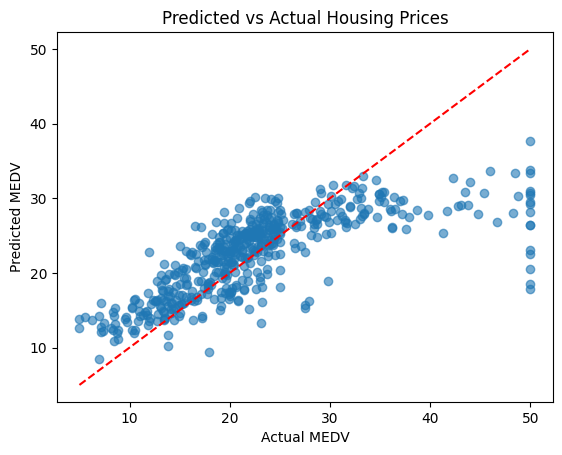

In [ ]:
y_pred = X_norm.dot(w) + b

plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect fit line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs Actual Housing Prices")
plt.show()

In [ ]:
rmse = np.sqrt(np.mean((y - y_pred)**2))
print("RMSE:", rmse)

RMSE: 6.345390492202762
